In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats

In [35]:
theta_data = 0.25
n_data = 10
x = scipy.stats.binom(n=n_data, p=theta_data).rvs(100)

prior_a_theta = 2
prior_b_theta = 3

theta_current = 0.5

prior_current = scipy.stats.beta(prior_a_theta, prior_b_theta).pdf(theta_current)

likelihood_current = scipy.stats.binom(n=n_data, p=theta_current).pmf(x).prod()

proposal_width = 1
theta_proposal = scipy.stats.norm(theta_current, proposal_width).rvs()

prior_proposal = scipy.stats.beta(prior_a_theta, prior_b_theta).pdf(theta_proposal)
likelihood_proposal = scipy.stats.binom(n=n_data, p=theta_proposal).pmf(x).prod()

p_current = likelihood_current * prior_current
p_proposal = likelihood_proposal * prior_proposal
p_accept = p_proposal / p_current

In [36]:
def sampler(data, samples=4, theta_init=.5, proposal_width=.5, prior_a_theta=2, prior_b_theta=3):
    theta_current = theta_init
    posterior = [theta_current]
    for i in range(samples):
        # suggest new position
        theta_proposal = scipy.stats.norm(theta_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = scipy.stats.binom(n=n_data, p=theta_current).pmf(data).prod()
        likelihood_proposal = scipy.stats.binom(n=n_data, p=theta_proposal).pmf(data).prod()
        
        # Compute prior probability of current and proposed theta        
        prior_current = scipy.stats.beta(prior_a_theta, prior_b_theta).pdf(theta_current)
        prior_proposal = scipy.stats.beta(prior_a_theta, prior_b_theta).pdf(theta_proposal)
                
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        accept = np.random.rand() < p_accept
        
        if accept:
            # Update position
            theta_current = theta_proposal
        
        posterior.append(theta_current)
        
    return posterior

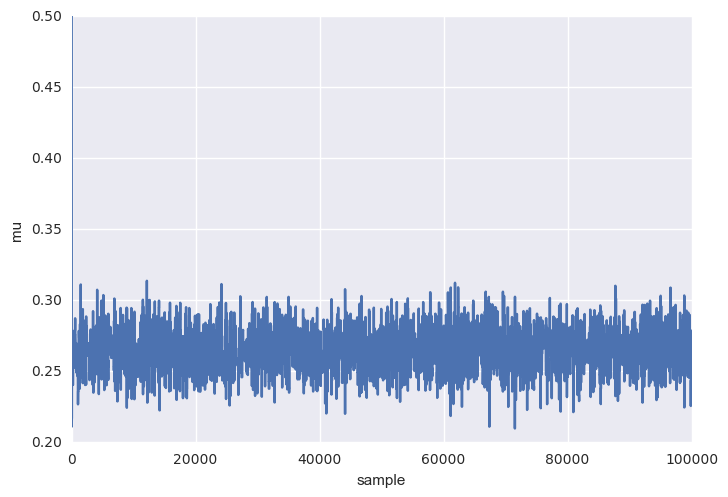

In [42]:
posterior = sampler(x, samples=100000)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu');

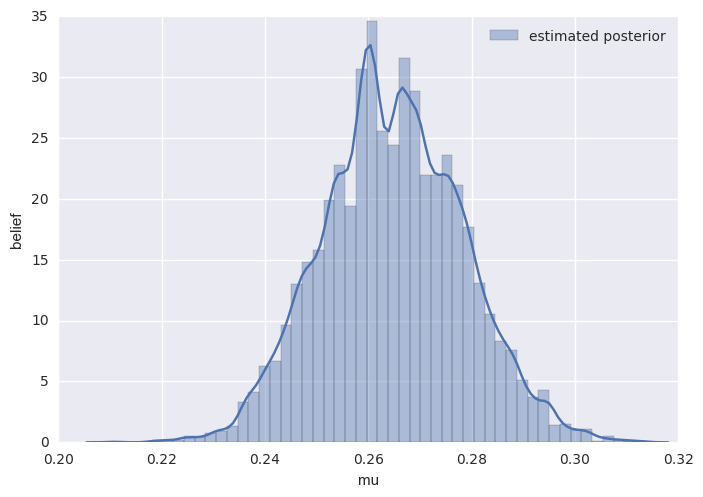

In [43]:
import seaborn as sns

ax = plt.subplot()

sns.distplot(posterior[500:], ax=ax, label='estimated posterior')
x_s = np.linspace(-.5, .5, 500)

_ = ax.set(xlabel='mu', ylabel='belief');
ax.legend();